In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
csv_path = "/Users/shubhamnaik/Documents/sideprojects/IMDb-Top-Rated-Movies-by-Decade/data/imdb_top_250.csv"
df = pd.read_csv(csv_path)
print(df.columns.tolist())
df.head()

['Rank', 'Title', 'Year', 'Rating', 'Runtime']


,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


In [30]:
df["year"] = pd.to_datetime(df["Year"], format="%Y").dt.year
df["decade"] = (df["year"] // 10) * 10
df[["Title","year","decade"]].head()


,Title,year,decade
0,The Shawshank Redemption,1994,1990
1,The Godfather,1972,1970
2,The Dark Knight,2008,2000
3,The Godfather Part II,1974,1970
4,12 Angry Men,1957,1950


In [31]:
movies_per_decade = df.groupby("decade").size().sort_index()
movies_per_decade

decade
1920     6
1930     6
1940    13
1950    24
1960    17
1970    20
1980    30
1990    45
2000    47
2010    41
2020     1
dtype: int64

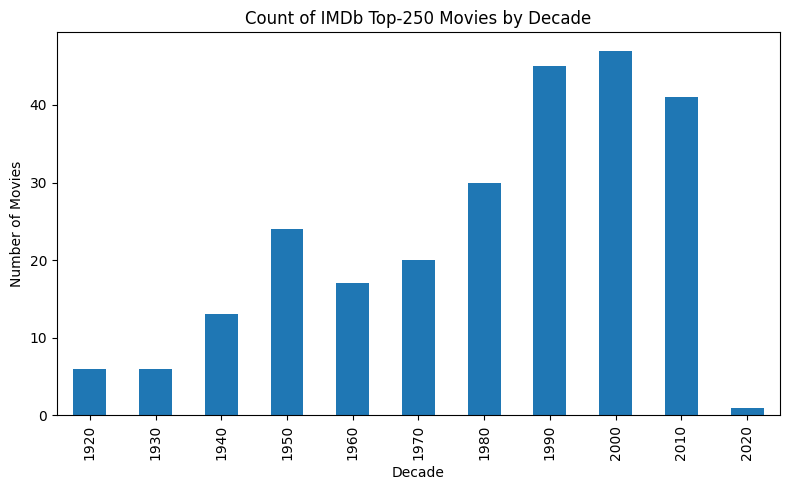

In [32]:
plt.figure(figsize=(8,5))
movies_per_decade.plot(kind="bar")
plt.title("Count of IMDb Top-250 Movies by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig("movies_per_decade.png")
plt.show()


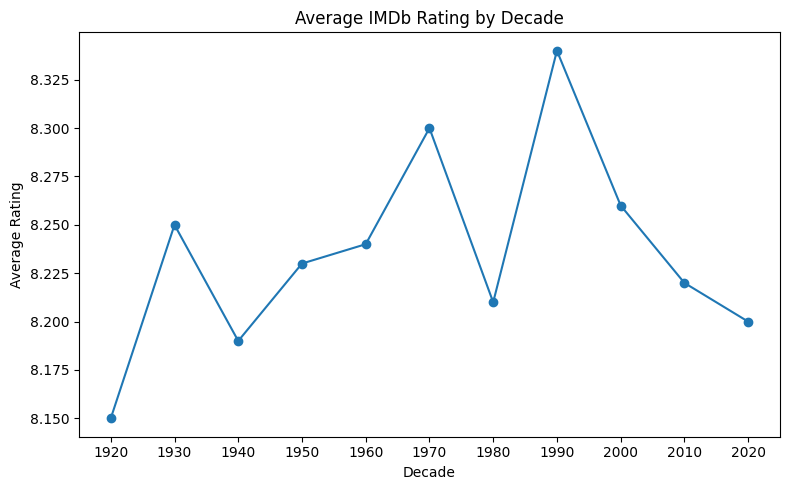

In [33]:
avg_rating = df.groupby("decade")["Rating"].mean().round(2)
plt.figure(figsize=(8,5))
avg_rating.plot(marker="o")
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.xticks(avg_rating.index)
plt.tight_layout()
plt.savefig("avg_rating_by_decade.png")
plt.show()


<Figure size 800x500 with 0 Axes>

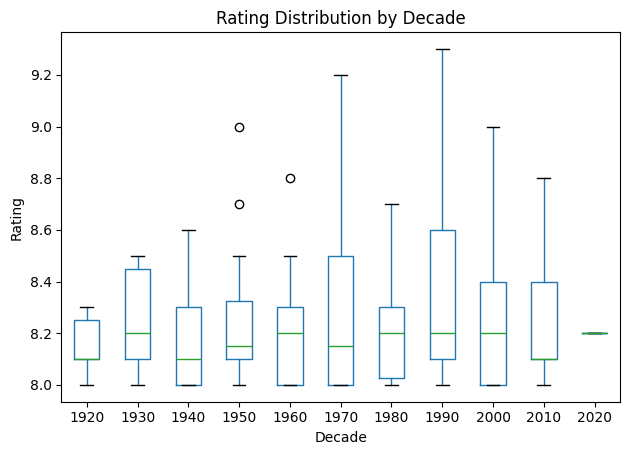

In [34]:
plt.figure(figsize=(8,5))
df.boxplot(column="Rating", by="decade", grid=False)
plt.title("Rating Distribution by Decade")
plt.suptitle("") 
plt.xlabel("Decade")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("rating_distribution_by_decade.png")
plt.show()
